In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import Dense,Dropout
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam,RMSprop
from sklearn.model_selection import GridSearchCV,KFold

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving forestfires.csv to forestfires.csv


In [ ]:
forestfire_data=pd.read_csv("forestfires.csv")
forestfire_data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [ ]:
#EDA
forestfire_data.shape

(517, 31)

In [ ]:
forestfire_data.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [ ]:
forestfire_data.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [ ]:
forestfire_data.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [ ]:
forestfire_data.describe(include='all')

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
count,517,517,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517
unique,12,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,aug,sun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,small
freq,184,95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,378
mean,NaN,NaN,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,...,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689,NaN
std,NaN,NaN,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,...,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632,NaN
min,NaN,NaN,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,NaN,NaN,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,NaN,NaN,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN


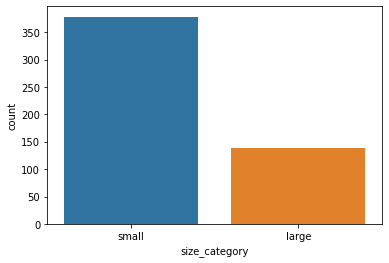

In [ ]:
#Visualization of Data parameters
sns.countplot(forestfire_data['size_category'])
plt.show()

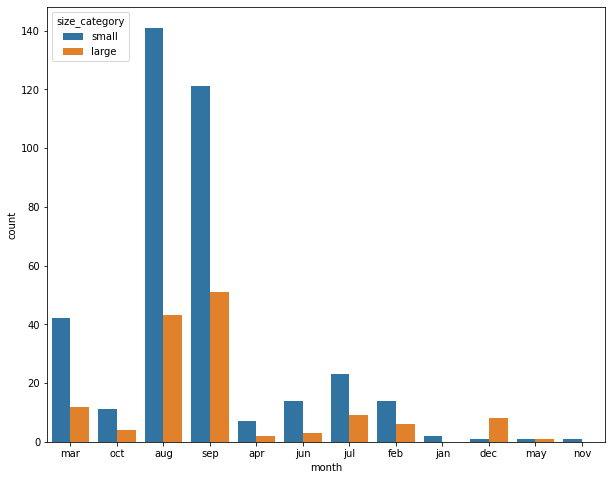

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x = forestfire_data['month'],hue=forestfire_data['size_category'])
plt.show()

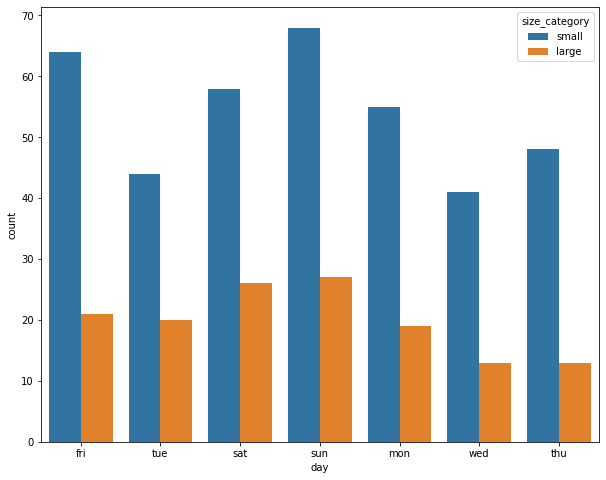

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x = forestfire_data['day'],hue=forestfire_data['size_category'])
plt.show()

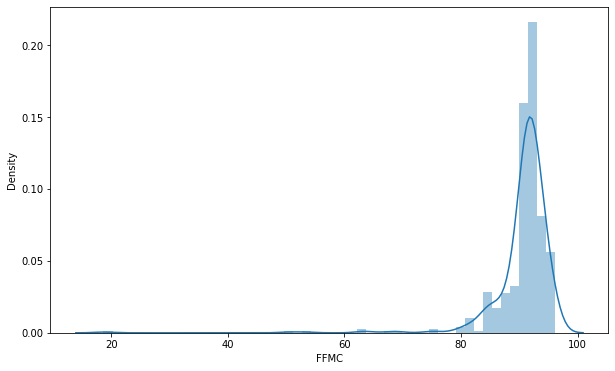

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(forestfire_data['FFMC'],)
plt.show()

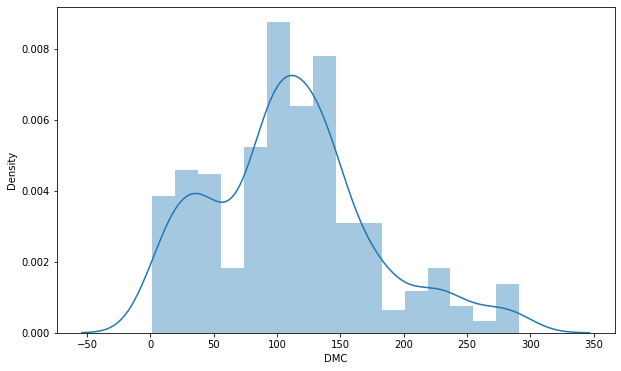

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(forestfire_data['DMC'],)
plt.show()

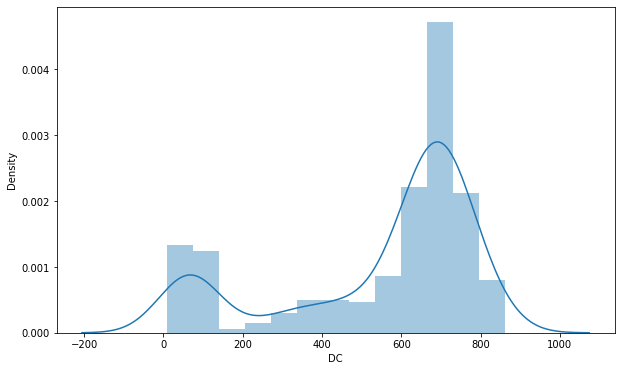

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(forestfire_data['DC'],)
plt.show()

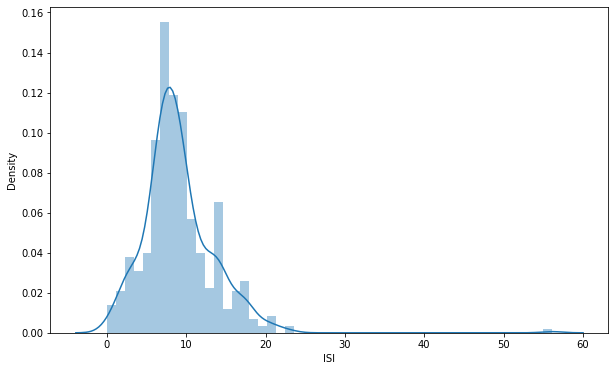

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(forestfire_data['ISI'],)
plt.show()

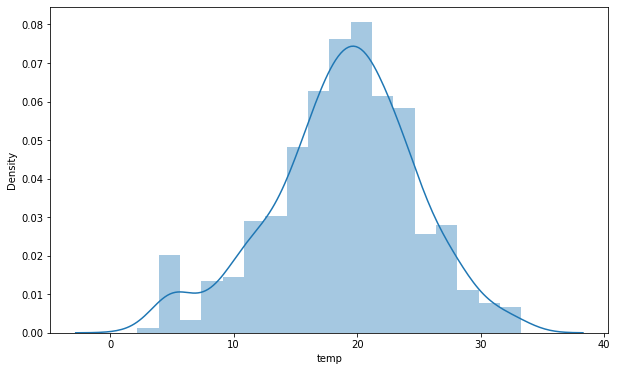

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(forestfire_data['temp'],)
plt.show()

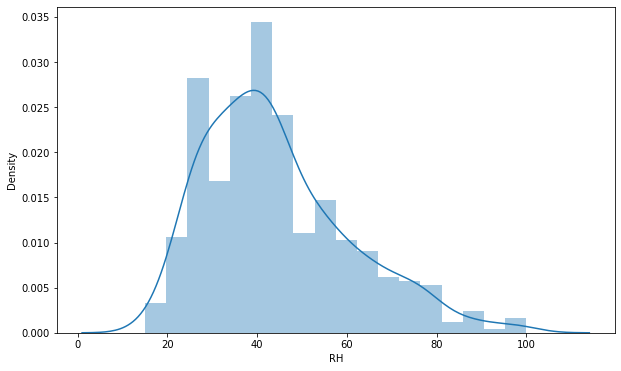

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(forestfire_data['RH'],)
plt.show()

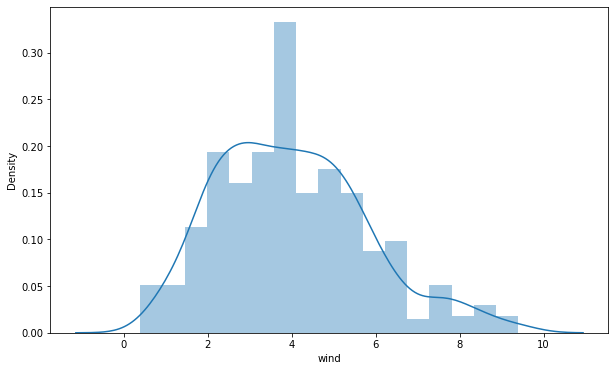

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(forestfire_data['wind'],)
plt.show()

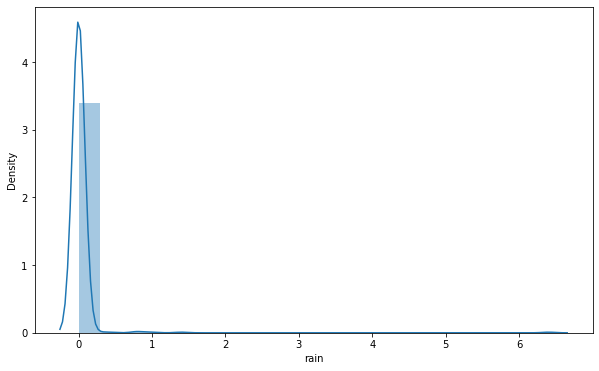

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(forestfire_data['rain'],)
plt.show()

In [ ]:
drop_data = forestfire_data.drop(labels=['month','day'],axis = 1)
drop_data

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,large
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,large
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small


In [ ]:
le = LabelEncoder()
drop_data['size_category'] = le.fit_transform(drop_data['size_category'])
drop_data

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1


<AxesSubplot:xlabel='size_category', ylabel='count'>

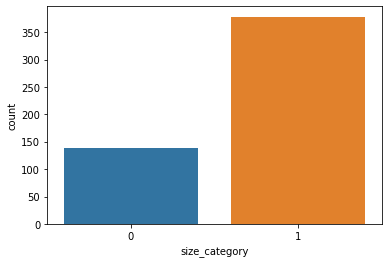

In [ ]:
sns.countplot(drop_data['size_category'])

In [ ]:
drop_data['size_category'].replace({'small':0,'large':0},inplace = True)

In [ ]:
drop_data

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
corr=drop_data.corr()
corr

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122,0.019306,...,-0.281535,-0.454771,0.031833,-0.040634,-0.074327,-0.037230,-0.088964,-0.005998,0.076609,-0.022063
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994,-0.012010,...,-0.317899,-0.105647,-0.001946,-0.050403,-0.407404,-0.081980,-0.074218,-0.187632,0.110907,-0.034715
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383,-0.004220,...,-0.399277,-0.115064,-0.100887,-0.186183,-0.650427,-0.114209,-0.078380,0.093279,0.531857,-0.019428
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258,0.046695,...,-0.249777,-0.103588,0.020982,0.111516,-0.143520,-0.060493,-0.076559,-0.071154,-0.068877,0.008726
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844,-0.071949,...,-0.320015,-0.146520,0.142588,0.051015,-0.341797,-0.045540,-0.053798,-0.053513,0.088006,-0.006021
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519,0.064506,...,0.140430,0.170923,0.013185,0.009382,-0.089836,0.086822,-0.035885,-0.072334,-0.062596,0.045243
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317,0.118090,...,-0.029431,-0.070245,-0.040645,0.012124,0.181433,0.015054,0.011864,-0.053850,-0.181476,-0.059113
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366,-0.004261,...,-0.014698,-0.004566,-0.013390,-0.013510,-0.020744,-0.004566,-0.003225,-0.012665,-0.051733,-0.050001
area,0.040122,0.072994,0.049383,0.008258,0.097844,-0.075519,0.012317,-0.007366,1.000000,-0.052911,...,-0.020732,-0.012589,0.006149,-0.020314,-0.045596,0.006264,-0.008893,-0.016878,0.056573,-0.311322
dayfri,0.019306,-0.012010,-0.004220,0.046695,-0.071949,0.064506,0.118090,-0.004261,-0.052911,1.000000,...,0.046323,-0.027643,-0.048969,0.006000,0.036205,0.056423,-0.019527,-0.045585,0.107671,0.021810


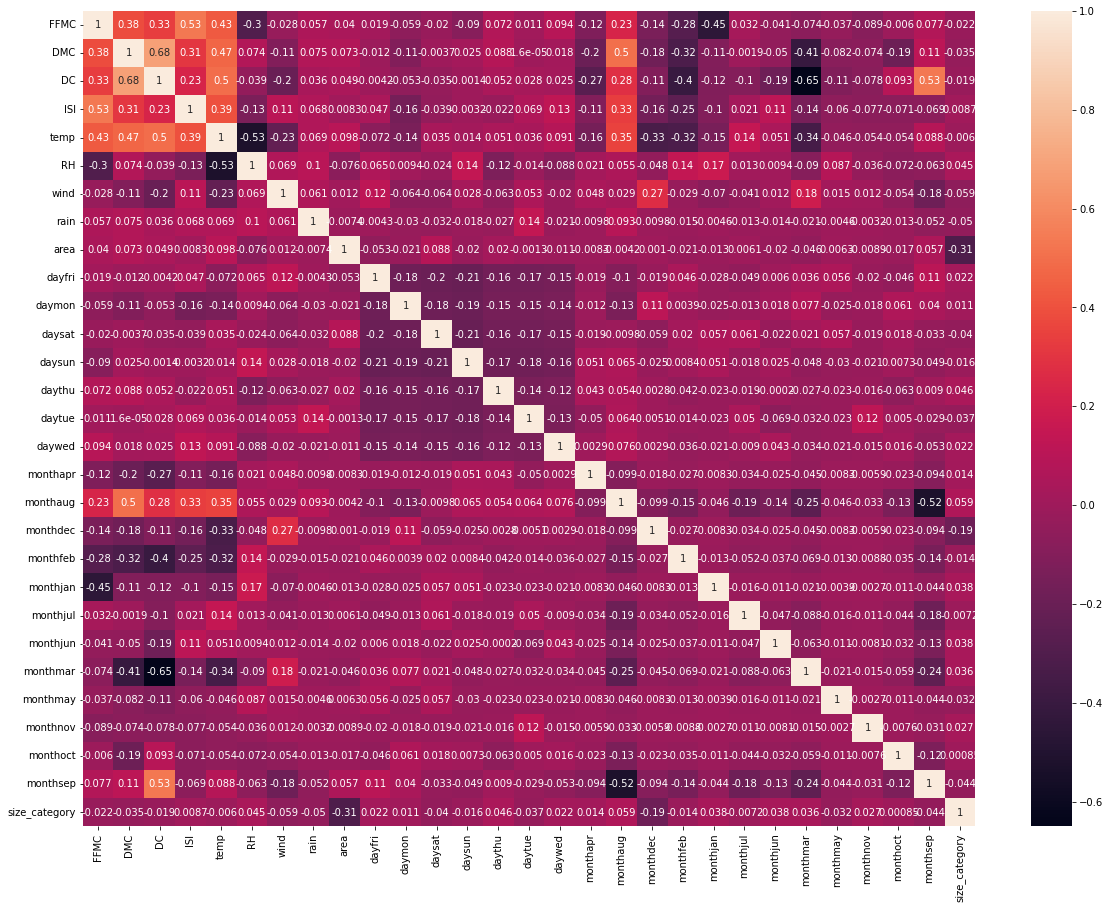

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(corr,annot=True)
plt.show()

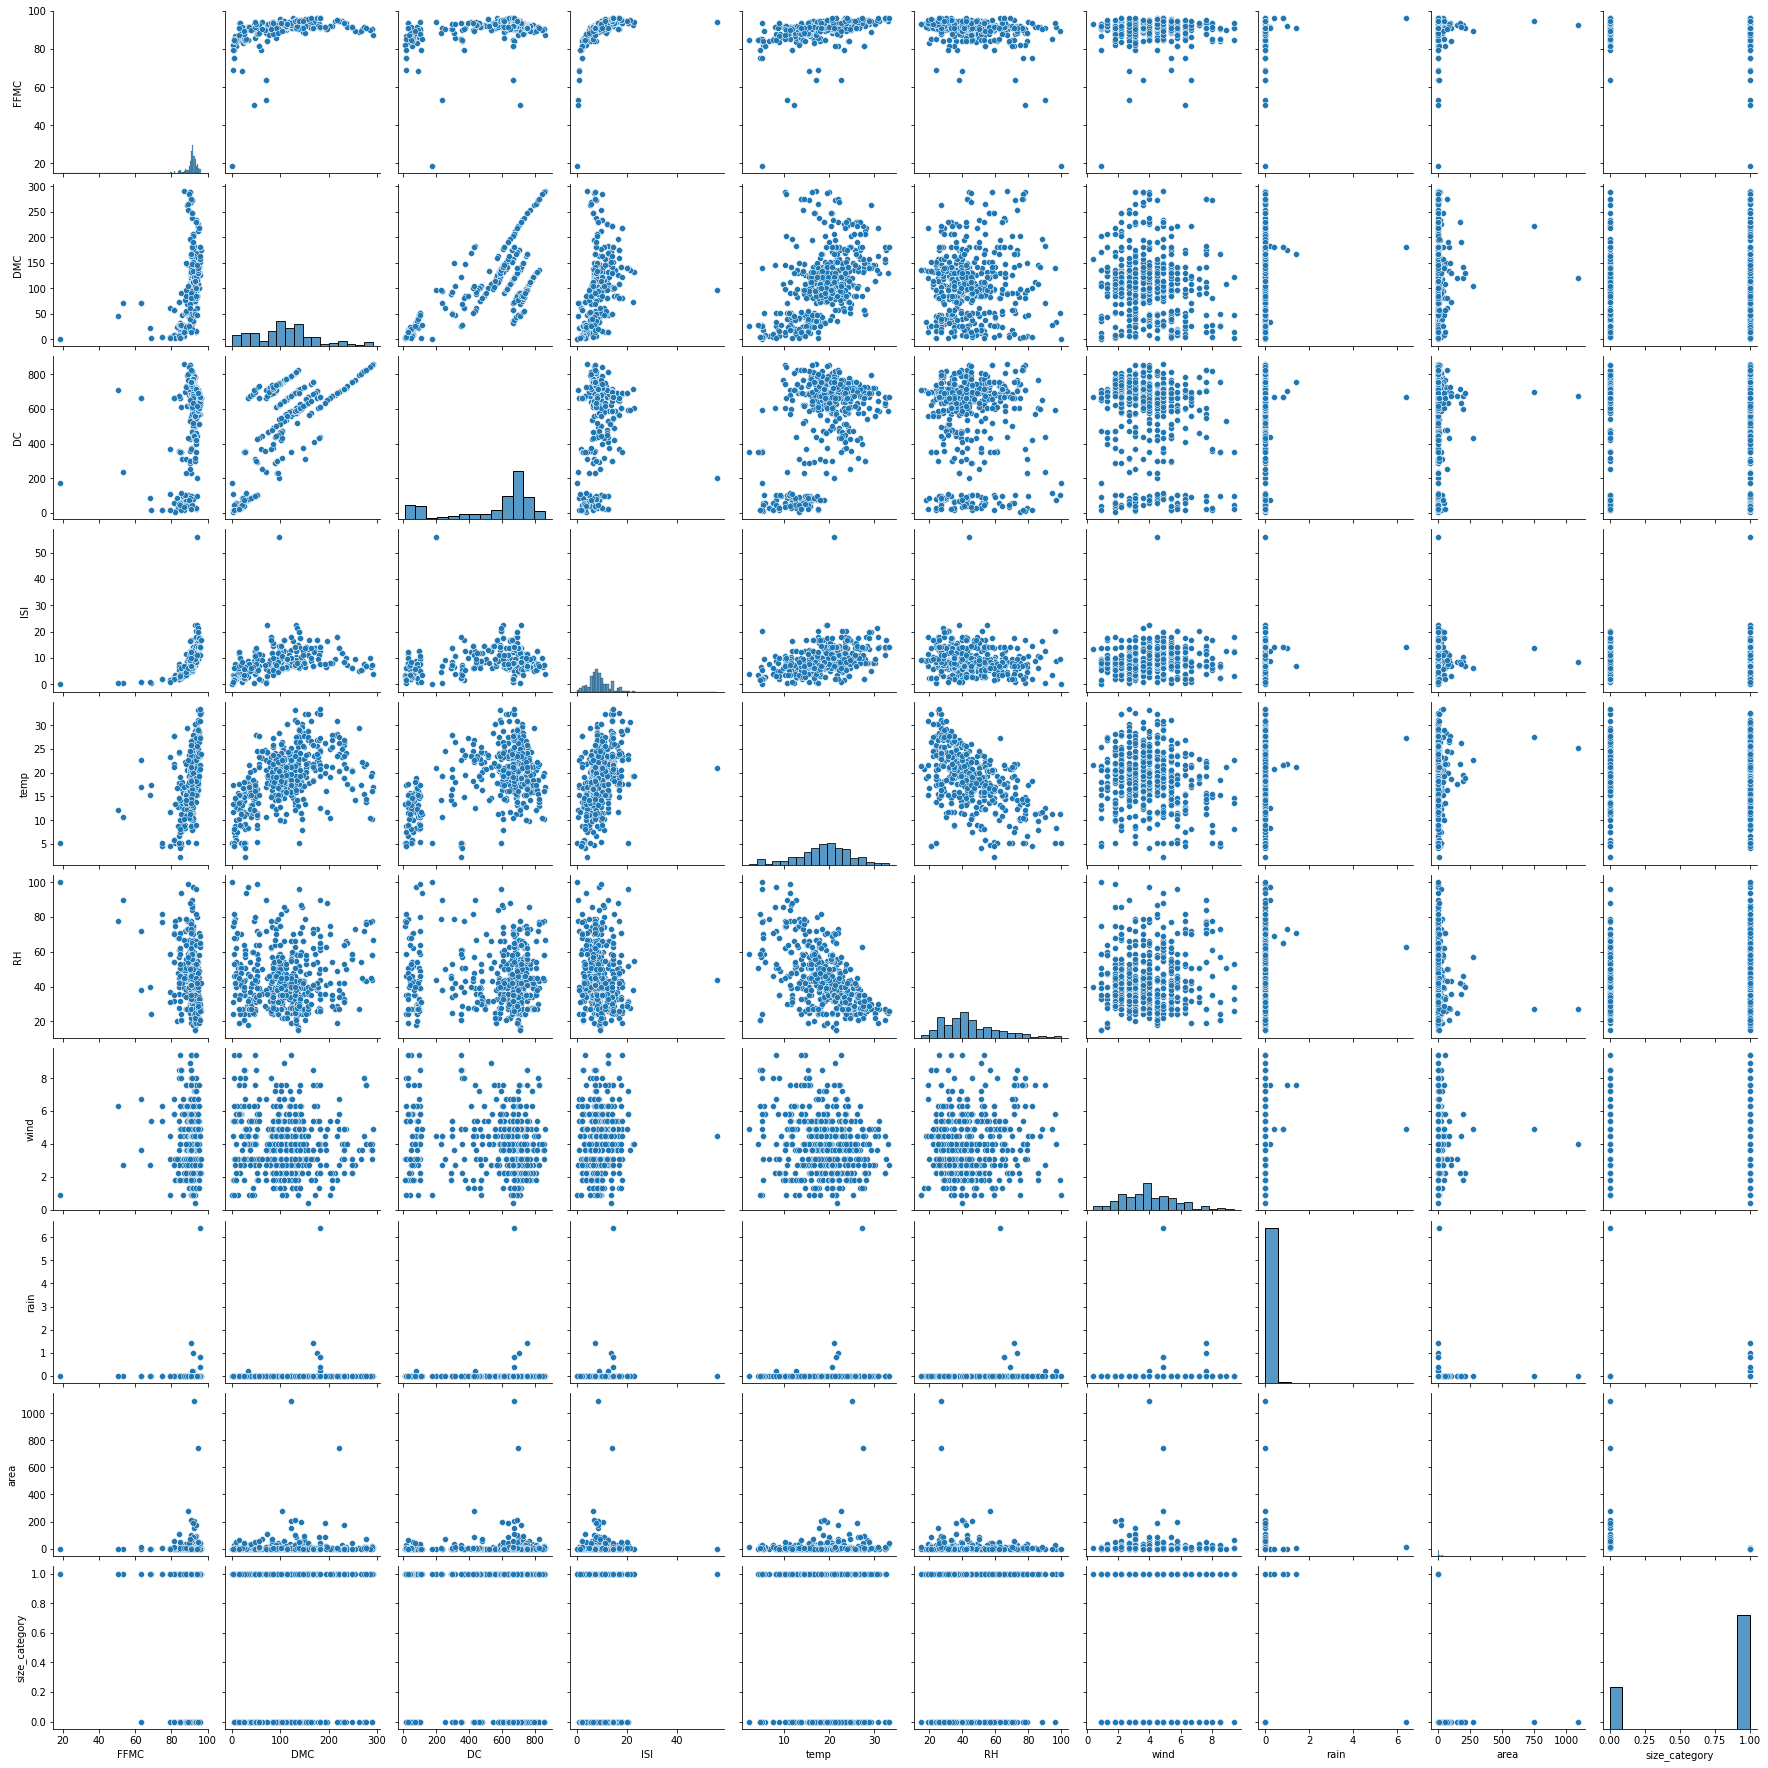

In [ ]:
pair_data = pd.concat([drop_data.iloc[:,0:9],drop_data.iloc[:,-1]],axis = 1)
sns.pairplot(pair_data)
plt.show()

In [ ]:
x = drop_data.drop(labels='size_category',axis = 1)
y = drop_data[['size_category']]

In [ ]:
x

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y

,size_category
0,1
1,1
2,1
3,1
4,1
...,...
512,0
513,0
514,0
515,1


In [ ]:
x_train, x_test, y_train, y_test  = train_test_split(x,y,test_size=0.30,random_state=12)

In [ ]:
x_train.shape,y_train.shape

((361, 28), (361, 1))

In [ ]:
y_train.shape,y_train.shape

((361, 1), (361, 1))

In [ ]:
sm = SMOTE(random_state=12)
x_train_sm,y_train_sm = sm.fit_resample(x_train,np.array(y_train).ravel())
x_train_sm,y_train_sm

(          FFMC         DMC          DC        ISI       temp  RH      wind  \
 0    93.700000  101.300000  458.800000  11.900000  19.300000  39  7.200000   
 1    92.800000  119.000000  783.500000   7.500000  16.800000  28  4.000000   
 2    92.100000  152.600000  658.200000  14.300000  20.200000  47  4.000000   
 3    93.700000  101.300000  423.400000  14.700000  26.100000  45  4.000000   
 4    90.800000   41.900000   89.400000   7.900000  13.300000  42  0.900000   
 ..         ...         ...         ...        ...        ...  ..       ...   
 533  91.372665  137.325971  680.945740   9.473142  16.000477  58  5.690184   
 534  87.307221   10.323502   25.368854   7.059981   9.503587  39  6.480038   
 535  93.839786   81.878499  686.854129  17.434048  22.477775  30  4.900000   
 536  91.810487  169.218024  632.028060  10.420531  20.563220  53  3.168242   
 537  93.914567  165.944421  706.169390  15.226172  20.152591  49  4.182222   
 
      rain       area  dayfri  ...  monthdec  mont

In [ ]:
x_train_sm.shape,y_train_sm.shape

((538, 28), (538,))

In [ ]:
x_train = x_train_sm.copy()
y_train = y_train_sm.copy()

In [ ]:
scale = MinMaxScaler()
X_train = scale.fit_transform(x_train)
X_train

array([[0.96774194, 0.34683281, 0.53209818, ..., 0.        , 0.        ,
        0.        ],
       [0.95612903, 0.40809969, 0.91527024, ..., 0.        , 0.        ,
        1.        ],
       [0.94709677, 0.52440291, 0.76740618, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.96954562, 0.27960713, 0.80122036, ..., 0.        , 0.        ,
        1.        ],
       [0.94336113, 0.58192462, 0.73652119, ..., 0.        , 0.        ,
        0.        ],
       [0.97051055, 0.57059336, 0.82401391, ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
X_test = scale.fit_transform(x_test)
X_test

array([[0.93251534, 0.57586327, 0.45927711, ..., 0.        , 0.        ,
        0.        ],
       [0.9202454 , 0.47017789, 0.67903614, ..., 0.        , 0.        ,
        0.        ],
       [0.84662577, 0.291594  , 0.8446988 , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.82822086, 0.67038716, 0.74614458, ..., 0.        , 0.        ,
        0.        ],
       [0.88650307, 0.416812  , 0.78325301, ..., 0.        , 0.        ,
        1.        ],
       [0.9202454 , 0.47017789, 0.67903614, ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
def creat_model():
    model = Sequential()
    model.add(Dense(8, input_dim = 28,kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(4,kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1,kernel_initializer='uniform', activation='sigmoid'))
    adam = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy',optimizer = adam,metrics='accuracy')
    return model

In [ ]:
model = KerasClassifier(build_fn=creat_model,verbose = 0)
batch_size = [10,30,50]
epochs = [10,20,50]
param_grid = dict(batch_size = batch_size,epochs = epochs)
gsv = GridSearchCV(estimator=model,param_grid=param_grid,cv = KFold(),verbose=5)
gsv_res = gsv.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ..........batch_size=10, epochs=10;, score=0.537 total time=   3.7s
[CV 2/5] END ..........batch_size=10, epochs=10;, score=0.685 total time=   2.8s
[CV 3/5] END ..........batch_size=10, epochs=10;, score=0.528 total time=   1.8s
[CV 4/5] END ..........batch_size=10, epochs=10;, score=0.271 total time=   1.9s
[CV 5/5] END ..........batch_size=10, epochs=10;, score=0.000 total time=   2.7s
[CV 1/5] END ..........batch_size=10, epochs=20;, score=0.787 total time=   7.7s
[CV 2/5] END ..........batch_size=10, epochs=20;, score=0.685 total time=   4.8s
[CV 3/5] END ..........batch_size=10, epochs=20;, score=0.796 total time=   4.5s
[CV 4/5] END ..........batch_size=10, epochs=20;, score=0.813 total time=   4.5s
[CV 5/5] END ..........batch_size=10, epochs=20;, score=0.813 total time=   4.5s
[CV 1/5] END ..........batch_size=10, epochs=50;, score=0.806 total time=   6.2s
[CV 2/5] END ..........batch_size=10, epochs=50;,

[CV 4/5] END ..........batch_size=50, epochs=10;, score=0.271 total time=   1.5s


[CV 5/5] END ..........batch_size=50, epochs=10;, score=0.000 total time=   1.3s
[CV 1/5] END ..........batch_size=50, epochs=20;, score=0.324 total time=   1.8s
[CV 2/5] END ..........batch_size=50, epochs=20;, score=0.509 total time=   2.2s
[CV 3/5] END ..........batch_size=50, epochs=20;, score=0.500 total time=   2.5s
[CV 4/5] END ..........batch_size=50, epochs=20;, score=0.271 total time=   1.9s
[CV 5/5] END ..........batch_size=50, epochs=20;, score=0.000 total time=   1.8s
[CV 1/5] END ..........batch_size=50, epochs=50;, score=0.731 total time=   2.5s
[CV 2/5] END ..........batch_size=50, epochs=50;, score=0.704 total time=   3.8s
[CV 3/5] END ..........batch_size=50, epochs=50;, score=0.769 total time=   2.1s
[CV 4/5] END ..........batch_size=50, epochs=50;, score=0.850 total time=   2.6s
[CV 5/5] END ..........batch_size=50, epochs=50;, score=0.000 total time=   2.8s


In [ ]:
print(gsv_res.best_params_,gsv_res.best_score_)

{'batch_size': 30, 'epochs': 50} 0.8105919003486634


In [ ]:
def creat_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(8, input_dim = 28,kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(4,kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1,kernel_initializer='uniform', activation='sigmoid'))
    adam = Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy',optimizer = adam,metrics='accuracy')
    return model

In [ ]:
model = KerasClassifier(build_fn=creat_model,batch_size = 10,epochs = 50,verbose = 0)
learning_rate = [0.1,0.01,0.001]
dropout_rate = [0.0,0.1,0.2]
param_grid = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)
gsv = GridSearchCV(estimator=model,param_grid=param_grid,cv= KFold(),verbose=5)
gsv_r = gsv.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END dropout_rate=0.0, learning_rate=0.1;, score=0.824 total time=   4.4s
[CV 2/5] END dropout_rate=0.0, learning_rate=0.1;, score=0.352 total time=   4.2s
[CV 3/5] END dropout_rate=0.0, learning_rate=0.1;, score=0.815 total time=   6.2s
[CV 4/5] END dropout_rate=0.0, learning_rate=0.1;, score=0.271 total time=   5.6s
[CV 5/5] END dropout_rate=0.0, learning_rate=0.1;, score=0.000 total time=   5.4s
[CV 1/5] END dropout_rate=0.0, learning_rate=0.01;, score=0.870 total time=   6.2s
[CV 2/5] END dropout_rate=0.0, learning_rate=0.01;, score=0.787 total time=   6.3s
[CV 3/5] END dropout_rate=0.0, learning_rate=0.01;, score=0.815 total time=   4.4s
[CV 4/5] END dropout_rate=0.0, learning_rate=0.01;, score=0.916 total time=   4.8s
[CV 5/5] END dropout_rate=0.0, learning_rate=0.01;, score=0.000 total time=   5.4s
[CV 1/5] END dropout_rate=0.0, learning_rate=0.001;, score=0.796 total time=   4.4s
[CV 2/5] END dropout_rate=0.0, 

In [ ]:
print(gsv_r.best_params_,gsv_r.best_score_)

{'dropout_rate': 0.2, 'learning_rate': 0.001} 0.8329352617263794


In [ ]:
def creat_model(Activation_Function,init):
    model = Sequential()
    model.add(Dense(8, input_dim = 28,kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(4,kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(1,kernel_initializer='uniform', activation='sigmoid'))
    adam = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy',optimizer = adam,metrics='accuracy')
    return model

In [ ]:
model = KerasClassifier(build_fn=creat_model,batch_size = 10,epochs = 50,verbose = 0)
Activation_Function = ['relu','tanh','softmax','linear']
init = ['zero','uniform','normal']
param_grid = dict(Activation_Function = Activation_Function,init = init)
gsv = GridSearchCV(estimator=model,param_grid=param_grid,cv= KFold(),verbose=5)
gsv_result = gsv.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END Activation_Function=relu, init=zero;, score=0.824 total time=   8.7s
[CV 2/5] END Activation_Function=relu, init=zero;, score=0.759 total time=   6.2s
[CV 3/5] END Activation_Function=relu, init=zero;, score=0.843 total time=   7.8s
[CV 4/5] END Activation_Function=relu, init=zero;, score=0.860 total time=   5.5s
[CV 5/5] END Activation_Function=relu, init=zero;, score=0.963 total time=   5.7s
[CV 1/5] END Activation_Function=relu, init=uniform;, score=0.833 total time=   4.5s
[CV 2/5] END Activation_Function=relu, init=uniform;, score=0.741 total time=   5.4s
[CV 3/5] END Activation_Function=relu, init=uniform;, score=0.833 total time=   5.1s
[CV 4/5] END Activation_Function=relu, init=uniform;, score=0.860 total time=  11.4s
[CV 5/5] END Activation_Function=relu, init=uniform;, score=0.963 total time=   6.4s
[CV 1/5] END Activation_Function=relu, init=normal;, score=0.833 total time=   6.4s
[CV 2/5] END Activat

In [ ]:
print(gsv_result.best_score_,gsv_result.best_params_)


0.8533575654029846 {'Activation_Function': 'tanh', 'init': 'uniform'}


In [ ]:
def creat_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(8,input_dim=28,kernel_initializer='normal', activation='tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(4,kernel_initializer='normal',activation='tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(1,kernel_initializer='normal',activation='sigmoid'))
    adam = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [ ]:
model = KerasClassifier(build_fn=creat_model,batch_size = 10,epochs = 50,verbose = 0)
neuron1 = [24,16,8]
neuron2 = [12,8,4]
param_grid = dict(neuron1 = neuron1,neuron2=neuron2)
gsv = GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose=5)
gsv_n = gsv.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ............neuron1=24, neuron2=12;, score=0.870 total time=   7.7s
[CV 2/5] END ............neuron1=24, neuron2=12;, score=0.796 total time=   4.8s
[CV 3/5] END ............neuron1=24, neuron2=12;, score=0.861 total time=   6.5s
[CV 4/5] END ............neuron1=24, neuron2=12;, score=0.897 total time=   4.8s
[CV 5/5] END ............neuron1=24, neuron2=12;, score=0.963 total time=   5.6s
[CV 1/5] END .............neuron1=24, neuron2=8;, score=0.852 total time=   6.2s
[CV 2/5] END .............neuron1=24, neuron2=8;, score=0.833 total time=   6.2s
[CV 3/5] END .............neuron1=24, neuron2=8;, score=0.861 total time=   6.2s
[CV 4/5] END .............neuron1=24, neuron2=8;, score=0.888 total time=   6.3s
[CV 5/5] END .............neuron1=24, neuron2=8;, score=0.963 total time=   4.6s
[CV 1/5] END .............neuron1=24, neuron2=4;, score=0.870 total time=   6.2s
[CV 2/5] END .............neuron1=24, neuron2=4;,

In [ ]:
print(gsv_n.best_score_,gsv_n.best_params_)

0.8793700098991394 {'neuron1': 16, 'neuron2': 4}


In [ ]:
# best Parameters
# batch_size = 10
# epochs = 50
# dropout_rate = 0.1
# learning rate = 0.001
# activation_function = tanh
# kernel_initiative = normal
# neuron1 = 8
# neuron2 = 8

In [ ]:
def creat_model():
    model = Sequential()
    model.add(Dense(8,input_dim=28,kernel_initializer='normal', activation='tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(8,kernel_initializer='normal',activation='tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(1,kernel_initializer='normal',activation='sigmoid'))
    adam = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [ ]:
model = KerasClassifier(build_fn=creat_model,batch_size = 10,epochs = 50)
model.fit(X_train,y_train)

Epoch 1/50
54/54 [==============================] - 1s 2ms/step - loss: 0.6930 - accuracy: 0.4963
Epoch 2/50
54/54 [==============================] - 0s 2ms/step - loss: 0.6912 - accuracy: 0.6190
Epoch 3/50
54/54 [==============================] - 0s 2ms/step - loss: 0.6793 - accuracy: 0.7100
Epoch 4/50
54/54 [==============================] - 0s 3ms/step - loss: 0.6409 - accuracy: 0.7342
Epoch 5/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5802 - accuracy: 0.7677
Epoch 6/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5175 - accuracy: 0.7993
Epoch 7/50
54/54 [==============================] - 0s 4ms/step - loss: 0.4701 - accuracy: 0.8216
Epoch 8/50
54/54 [==============================] - 0s 3ms/step - loss: 0.4453 - accuracy: 0.8141
Epoch 9/50
54/54 [==============================] - 0s 5ms/step - loss: 0.4184 - accuracy: 0.8197
Epoch 10/50
54/54 [==============================] - 0s 4ms/step - loss: 0.4082 - accuracy: 0.8290
Epoch 11/50
54/54 [

In [ ]:
y_predict = model.predict(X_train)

17/17 [==============================] - 0s 3ms/step


In [ ]:
accuracy_score(y_train,y_predict)

0.912639405204461

In [ ]:
confusion_matrix(y_train,y_predict)

array([[222,  47],
       [  0, 269]])

In [ ]:
print(classification_report(y_train,y_predict))

              precision    recall  f1-score   support

           0       1.00      0.83      0.90       269
           1       0.85      1.00      0.92       269

    accuracy                           0.91       538
   macro avg       0.93      0.91      0.91       538
weighted avg       0.93      0.91      0.91       538



In [ ]:
# testing data
y_test_pred = model.predict(X_test)

5/5 [==============================] - 0s 3ms/step


In [ ]:
accuracy_score(y_test,y_test_pred)

0.8525641025641025

In [ ]:
confusion_matrix(y_test,y_test_pred)

array([[45,  2],
       [21, 88]])

In [ ]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.68      0.96      0.80        47
           1       0.98      0.81      0.88       109

    accuracy                           0.85       156
   macro avg       0.83      0.88      0.84       156
weighted avg       0.89      0.85      0.86       156



**QUESTION NO.=2**

---



---



In [ ]:
from keras.layers import Dense
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving gas_turbines.csv to gas_turbines.csv


In [ ]:
df=pd.read_csv("gas_turbines.csv")
df=df.iloc[:,[7,0,1,2]]
df.shape

(15039, 4)

In [ ]:
df.describe()

,TEY,AT,AP,AH
count,15039.000000,15039.000000,15039.00000,15039.000000
mean,134.188464,17.764381,1013.19924,79.124174
std,15.829717,7.574323,6.41076,13.793439
min,100.170000,0.522300,985.85000,30.344000
25%,127.985000,11.408000,1008.90000,69.750000
50%,133.780000,18.186000,1012.80000,82.266000
75%,140.895000,23.862500,1016.90000,90.043500
max,174.610000,34.929000,1034.20000,100.200000


In [ ]:
df.isnull().sum()

TEY    0
AT     0
AP     0
AH     0
dtype: int64

In [ ]:
x=df.iloc[:,1:5]
y=df.iloc[:,0]

In [ ]:
x

,AT,AP,AH
0,6.8594,1007.9,96.799
1,6.7850,1008.4,97.118
2,6.8977,1008.8,95.939
3,7.0569,1009.2,95.249
4,7.3978,1009.7,95.150
...,...,...,...
15034,9.0301,1005.6,98.460
15035,7.8879,1005.9,99.093
15036,7.2647,1006.3,99.496
15037,7.0060,1006.8,99.008


In [ ]:
y

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY, Length: 15039, dtype: float64

In [ ]:
seed = 7
np.random.seed(seed)
model = Sequential()
model.add(Dense(12, input_dim=3,  kernel_initializer='uniform', activation='relu'))
model.add(Dense(8,  kernel_initializer='uniform', activation='relu'))
model.add(Dense(1,  kernel_initializer='uniform', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history= model.fit(x, y,validation_split=0.33, epochs=150, batch_size=10)

Epoch 1/150
1008/1008 [==============================] - 3s 3ms/step - loss: -5103254.5000 - accuracy: 0.0000e+00 - val_loss: -19840848.0000 - val_accuracy: 0.0000e+00
Epoch 2/150
1008/1008 [==============================] - 3s 3ms/step - loss: -68985984.0000 - accuracy: 0.0000e+00 - val_loss: -135452240.0000 - val_accuracy: 0.0000e+00
Epoch 3/150
1008/1008 [==============================] - 3s 3ms/step - loss: -255439952.0000 - accuracy: 0.0000e+00 - val_loss: -388261984.0000 - val_accuracy: 0.0000e+00
Epoch 4/150
1008/1008 [==============================] - 3s 3ms/step - loss: -594027904.0000 - accuracy: 0.0000e+00 - val_loss: -799336448.0000 - val_accuracy: 0.0000e+00
Epoch 5/150
1008/1008 [==============================] - 3s 3ms/step - loss: -1103547520.0000 - accuracy: 0.0000e+00 - val_loss: -1385690880.0000 - val_accuracy: 0.0000e+00
Epoch 6/150
1008/1008 [==============================] - 3s 2ms/step - loss: -1801344768.0000 - accuracy: 0.0000e+00 - val_loss: -2163935744.0000 -

In [ ]:
scores = model.evaluate(x, y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

470/470 [==============================] - 2s 5ms/step - loss: -10913409138688.0000 - accuracy: 0.0000e+00
accuracy: 0.00%


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

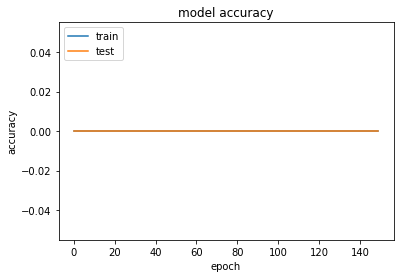

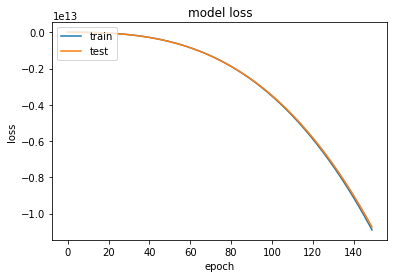

In [ ]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
a = StandardScaler()
a.fit(x)
X_standardized = a.transform(x)
pd.DataFrame(X_standardized).describe()

,0,1,2
count,1.503900e+04,1.503900e+04,1.503900e+04
mean,4.913654e-16,-1.875504e-14,2.570219e-16
std,1.000033e+00,1.000033e+00,1.000033e+00
min,-2.276462e+00,-4.266288e+00,-3.536594e+00
25%,-8.392292e-01,-6.706510e-01,-6.796337e-01
50%,5.566605e-02,-6.227861e-02,2.277844e-01
75%,8.051309e-01,5.772924e-01,7.916582e-01
max,2.266234e+00,3.275970e+00,1.528011e+00


In [ ]:
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=3, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))\
    
    adam=Adam(lr=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [ ]:
model = KerasClassifier(build_fn = create_model,verbose = 0)
# Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,50,100]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................


[CV 1/5; 1/9] END .....batch_size=10, epochs=10;, score=0.000 total time=  46.8s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................


[CV 2/5; 1/9] END .....batch_size=10, epochs=10;, score=0.000 total time=  44.5s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................


[CV 3/5; 1/9] END .....batch_size=10, epochs=10;, score=0.000 total time=  26.4s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................


[CV 4/5; 1/9] END .....batch_size=10, epochs=10;, score=0.000 total time=  44.4s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................


[CV 5/5; 1/9] END .....batch_size=10, epochs=10;, score=0.000 total time=  23.5s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................


[CV 1/5; 2/9] END .....batch_size=10, epochs=50;, score=0.000 total time= 2.4min
[CV 2/5; 2/9] START batch_size=10, epochs=50....................................


[CV 2/5; 2/9] END .....batch_size=10, epochs=50;, score=0.000 total time= 2.4min
[CV 3/5; 2/9] START batch_size=10, epochs=50....................................


[CV 3/5; 2/9] END .....batch_size=10, epochs=50;, score=0.000 total time= 2.4min
[CV 4/5; 2/9] START batch_size=10, epochs=50....................................


[CV 4/5; 2/9] END .....batch_size=10, epochs=50;, score=0.000 total time= 1.7min
[CV 5/5; 2/9] START batch_size=10, epochs=50....................................


[CV 5/5; 2/9] END .....batch_size=10, epochs=50;, score=0.000 total time= 2.4min
[CV 1/5; 3/9] START batch_size=10, epochs=100...................................


[CV 1/5; 3/9] END ....batch_size=10, epochs=100;, score=0.000 total time= 3.4min
[CV 2/5; 3/9] START batch_size=10, epochs=100...................................


[CV 2/5; 3/9] END ....batch_size=10, epochs=100;, score=0.000 total time= 3.4min
[CV 3/5; 3/9] START batch_size=10, epochs=100...................................


[CV 3/5; 3/9] END ....batch_size=10, epochs=100;, score=0.000 total time= 3.3min
[CV 4/5; 3/9] START batch_size=10, epochs=100...................................


[CV 4/5; 3/9] END ....batch_size=10, epochs=100;, score=0.000 total time= 3.2min
[CV 5/5; 3/9] START batch_size=10, epochs=100...................................


[CV 5/5; 3/9] END ....batch_size=10, epochs=100;, score=0.000 total time= 3.4min
[CV 1/5; 4/9] START batch_size=20, epochs=10....................................


[CV 1/5; 4/9] END .....batch_size=20, epochs=10;, score=0.000 total time=  11.5s
[CV 2/5; 4/9] START batch_size=20, epochs=10....................................


[CV 2/5; 4/9] END .....batch_size=20, epochs=10;, score=0.000 total time=  12.1s
[CV 3/5; 4/9] START batch_size=20, epochs=10....................................


[CV 3/5; 4/9] END .....batch_size=20, epochs=10;, score=0.000 total time=  11.2s
[CV 4/5; 4/9] START batch_size=20, epochs=10....................................


[CV 4/5; 4/9] END .....batch_size=20, epochs=10;, score=0.000 total time=  11.8s
[CV 5/5; 4/9] START batch_size=20, epochs=10....................................


[CV 5/5; 4/9] END .....batch_size=20, epochs=10;, score=0.000 total time=  10.9s
[CV 1/5; 5/9] START batch_size=20, epochs=50....................................


[CV 1/5; 5/9] END .....batch_size=20, epochs=50;, score=0.000 total time= 1.4min
[CV 2/5; 5/9] START batch_size=20, epochs=50....................................


[CV 2/5; 5/9] END .....batch_size=20, epochs=50;, score=0.000 total time= 1.4min
[CV 3/5; 5/9] START batch_size=20, epochs=50....................................


KeyboardInterrupt: ignored

In [ ]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

In [ ]:
def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(8,input_dim = 3,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(4,input_dim = 3,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

In [ ]:
model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,init = init)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y)

In [ ]:
def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 3,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.2))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

In [ ]:
model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters

neuron1 = [4,8,16]
neuron2 = [2,4,8]

# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y)

In [ ]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
def create_model():
    model = Sequential()
    model.add(Dense(16,input_dim = 3,kernel_initializer = 'normal',activation = 'linear'))
    model.add(Dropout(0.1))
    model.add(Dense(8,input_dim = 3,kernel_initializer = 'normal',activation = 'linear'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'linear'))
    
    adam = Adam(lr = 0.01) #sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

In [ ]:
model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 100)

# Fitting the model

model.fit(X_standardized,y)

# Predicting using trained model

y_predict = model.predict(X_standardized)

# Printing the metrics
print(accuracy_score(y_predict.round(),y.round()))